In [1]:
import ROOT
import math
import numpy as np
from funcs import getEtaPhiBins, sumTowers
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.24/00


In [2]:
file_With = 'inputNtuples/ntuple_VBFHToInv_NoPU_WithEnergySplit.root'

file_No = 'inputNtuples/ntuple_VBFHToInv_NoPU_NoEnergySplit.root'

isjet = True

In [3]:
f_With = ROOT.TFile.Open(file_With, "READ")
tree_With = f_With.Get("hgcalTriggerNtuplizer/HGCalTriggerNtuple")

f_No = ROOT.TFile.Open(file_No, "READ")
tree_No = f_No.Get("hgcalTriggerNtuplizer/HGCalTriggerNtuple")

In [73]:
def getBox(hist, genEta, genPhi):
    genEtaBin = histTot_With.GetXaxis().FindBin(genEta)
    genPhiBin = histTot_With.GetYaxis().FindBin(genPhi)
    
    x1 = hist.GetXaxis().GetBinLowEdge(genEtaBin)
    x2 = hist.GetXaxis().GetBinUpEdge(genEtaBin)
    y1 = hist.GetYaxis().GetBinLowEdge(genPhiBin)
    y2 = hist.GetYaxis().GetBinUpEdge(genPhiBin)
    
    b = ROOT.TBox(x1, y1, x2, y2);
    b.SetFillStyle(0);
    b.SetLineWidth(1);
    b.SetLineColor(2);
    return b

In [15]:
etaBinStep = 0.0870
minBinEta = -35
maxBinEta = 35
minEta = minBinEta * etaBinStep
maxEta = maxBinEta * etaBinStep
nBinsEta = maxBinEta - minBinEta
phiBinStep = 2*math.pi/72
minBinPhi = -36
maxBinPhi = 36
minPhi = minBinPhi * phiBinStep
maxPhi = maxBinPhi * phiBinStep
nBinsPhi = maxBinPhi - minBinPhi


In [5]:
histEM_With = ROOT.TH2D("histEM_With","",nBinsEta,minEta,maxEta, nBinsPhi,minPhi,maxPhi)
histHad_With = ROOT.TH2D("histHad_With","",nBinsEta,minEta,maxEta, nBinsPhi,minPhi,maxPhi)
histTot_With = ROOT.TH2D("histTot_With","",nBinsEta,minEta,maxEta, nBinsPhi,minPhi,maxPhi)

histEM_No = ROOT.TH2D("histEM_No","",nBinsEta,minEta,maxEta, nBinsPhi,minPhi,maxPhi)
histHad_No = ROOT.TH2D("histHad_No","",nBinsEta,minEta,maxEta, nBinsPhi,minPhi,maxPhi)
histTot_No = ROOT.TH2D("histTot_No","",nBinsEta,minEta,maxEta, nBinsPhi,minPhi,maxPhi)

In [294]:
entryNum = 50
#3, 50, 51, 55, 60, 61, 62, 

In [293]:
if(isjet):
    jetflag = 'jet'
else:
    jetflag = ''
for i in range(tree_With.GetEntries()):
    tree_With.GetEntry(i)
    if(getattr(tree_With,"gen" + jetflag + "_energy")[0]/np.cosh(getattr(tree_With,"gen" + jetflag + "_eta")[0])>140):
        print(i)

0
19
29
50
64
82
86
92
100
101
116
118
126
139
140
141
162
174
175
179
180
181
187
203
205
216
225
238
239
249
255
262
268
274
291
301
305
313
339
351
372
374
378
388
397
412
414
435
436
440
446
457
460
461
472
478
487
496
499
511
517
524
548
550
567
568
597
601
623
627
631
642
643
646
653
659
696
705
708
717
738
743
754
772
783
790
801
813
827
830
840
843
851
861
869
871
875
901
904
911
916
922
924


KeyboardInterrupt: 

In [295]:
tree_With.GetEntry(entryNum)
tower_iPhi_With = getattr(tree_With,"tower_iPhi")
tower_iEta_With = getattr(tree_With,"tower_iEta")
tower_etEm_With = getattr(tree_With,"tower_etEm")
tower_etHad_With = getattr(tree_With,"tower_etHad")
tower_n_With = getattr(tree_With,"tower_n")
tower_eta_With = getattr(tree_With,"tower_eta")
if(isjet):
    jetflag = 'jet'
else:
    jetflag = ''
gen_eta_With = getattr(tree_With,"gen" + jetflag + "_eta")
gen_phi_With = getattr(tree_With,"gen" + jetflag + "_phi")
gen_energy_With = getattr(tree_With,"gen" + jetflag + "_energy")


In [297]:
tree_No.GetEntry(entryNum)
tower_iPhi_No = getattr(tree_No,"tower_iPhi")
tower_iEta_No = getattr(tree_No,"tower_iEta")
tower_etEm_No = getattr(tree_No,"tower_etEm")
tower_etHad_No = getattr(tree_No,"tower_etHad")
tower_n_No = getattr(tree_No,"tower_n")
tower_eta_No = getattr(tree_No,"tower_eta")
if(isjet):
    jetflag = 'jet'
else:
    jetflag = ''
gen_eta_No = getattr(tree_No,"gen" + jetflag + "_eta")
gen_phi_No = getattr(tree_No,"gen" + jetflag + "_phi")
gen_energy_No = getattr(tree_No,"gen" + jetflag + "_energy")

In [298]:
histEM_With.Reset()
histHad_With.Reset()
histTot_With.Reset()

histEM_No.Reset()
histHad_No.Reset()
histTot_No.Reset()

for towerID in range(tower_n_With):
    etaPhiBins = getEtaPhiBins(tower_eta_With[towerID], tower_iEta_With[towerID], tower_iPhi_With[towerID])
    histEM_With.SetBinContent(etaPhiBins[0], etaPhiBins[1], tower_etEm_With[towerID])
    histHad_With.SetBinContent(etaPhiBins[0], etaPhiBins[1], tower_etHad_With[towerID])
    
for towerID in range(tower_n_No):
    etaPhiBins = getEtaPhiBins(tower_eta_No[towerID], tower_iEta_No[towerID], tower_iPhi_No[towerID])
    histEM_No.SetBinContent(etaPhiBins[0], etaPhiBins[1], tower_etEm_No[towerID])
    histHad_No.SetBinContent(etaPhiBins[0], etaPhiBins[1], tower_etHad_No[towerID])
    


histTot_With.Add(histEM_With)
histTot_With.Add(histHad_With)

histTot_No.Add(histEM_No)
histTot_No.Add(histHad_No)

True

In [299]:
rank = 0
b_With = getBox(histTot_With, gen_eta_With[rank], gen_phi_With[rank])
b_No = getBox(histTot_No, gen_eta_No[rank], gen_phi_No[rank])

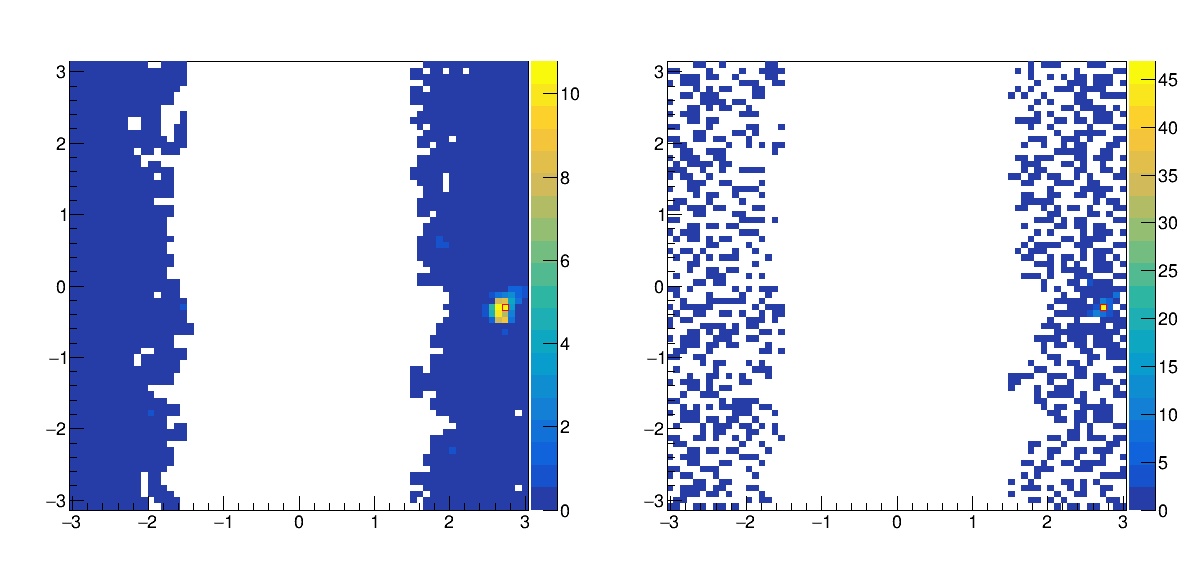

In [301]:
cTot = ROOT.TCanvas("","", 1200, 600)
cTot.Divide(2,0)
cTot.cd(1)
histTot_With.Draw('colz')
b_With.Draw()
cTot.cd(2)
histTot_No.Draw('colz')
cTot.Draw()
b_No.Draw()

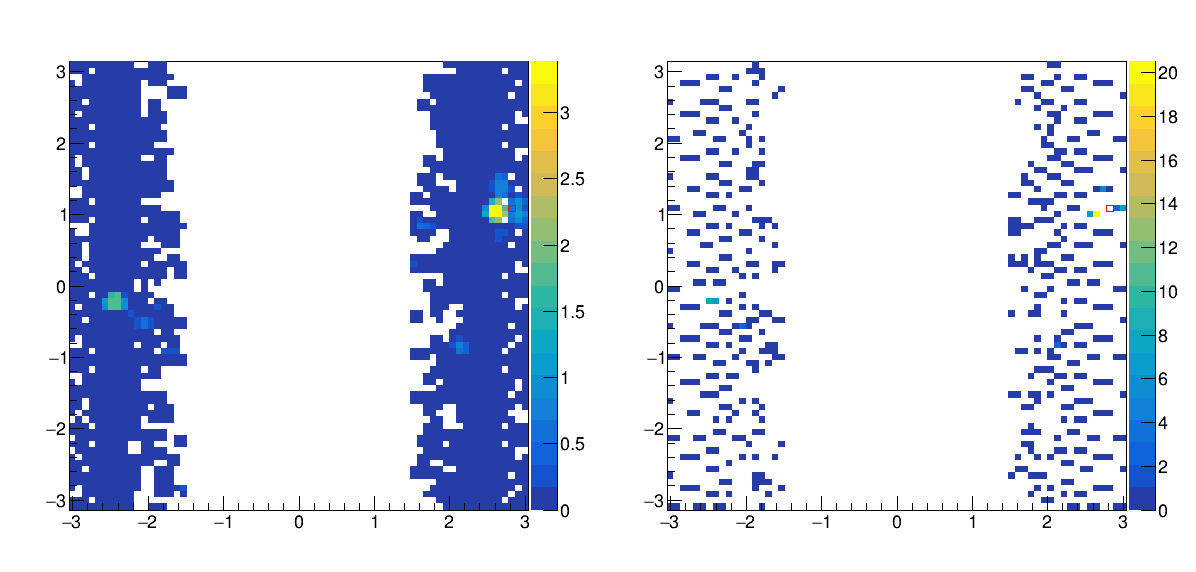

In [277]:
cEM = ROOT.TCanvas("","", 1200, 600)
cEM.Divide(2,0)
cEM.cd(1)
histEM_With.Draw('colz')
b_With.Draw()
cEM.cd(2)
histEM_No.Draw('colz')
cEM.Draw()
b_No.Draw()

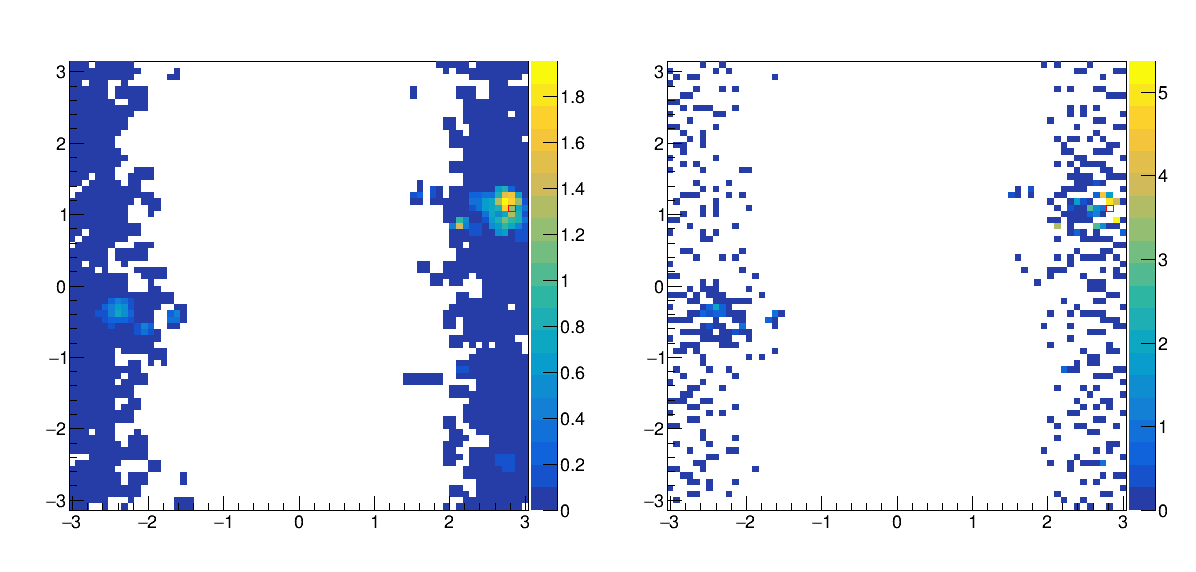

In [278]:
cHad = ROOT.TCanvas("","", 1200, 600)
cHad.Divide(2,0)
cHad.cd(1)
histHad_With.Draw('colz')
b_With.Draw()
cHad.cd(2)
histHad_No.Draw('colz')
cHad.Draw()
b_No.Draw()

In [279]:
cEM.Delete()
cHad.Delete()
cTot.Delete()

Warning in <TCanvas::Delete()>: may not use this method
Warning in <TCanvas::Delete()>: may not use this method
Warning in <TCanvas::Delete()>: may not use this method
